## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [32]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [33]:
#I will import data from CSV file to pd data frame and I will check the first couple rows and i will name ab stand for A/B test
ab=pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### findings 
In the above table contain the following:
1. user_id : should be unique
2. timestap: time of the events
3. group: Weather control or treatment
4. landing_page: weather old_page or new_page
5. converted: Yes or No which represented as 0's or 1's

b. Use the cell below to find the number of rows in the dataset.

In [34]:
# number of total rows
print("Number of A/B test is: ({:,})".format(ab.shape[0]),'rows')

Number of A/B test is: (294,478) rows


c. The number of unique users in the dataset.

In [35]:
#number of unique rows
print("Number of unique user_id is : ({:,}) ".format(len(ab['user_id'].unique())),'rows')

Number of unique user_id is : (290,584)  rows


d. The proportion of users converted.

In [36]:
# propotion of user converted 
print("The proportion of users converted is ({:,})".format(ab['converted'].mean()))

The proportion of users converted is (0.11965919355605512)


e. The number of times the `new_page` and `treatment` don't match.

In [37]:
# number of rows when "group=treatment not line up with landing_page= new_page"
# so we will find it in the oppisit why by finding (treatment & old_page) or (cotrol & old_page) so the rest will be our output

x=ab.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page")')['user_id'].count()
print("The number of times the new_page and treatment don't match ({:,})".format(x),"rows")

The number of times the new_page and treatment don't match (3,893) rows


f. Do any of the rows have missing values?

In [38]:
#finding the number of missing data.
ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

The anser to question "f" is No, we do not have any missing data

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [39]:
# first of all we need new copy of our ab data farme to work with it then extract only dataframe that hold treatment&new_page only
ab2=ab.query('(group=="treatment" & landing_page=="new_page") or (group=="control" & landing_page=="old_page")')
print("Number of rows of new df ab2 ({:,})".format(len(ab2)))

Number of rows of new df ab2 (290,585)


In [40]:
# Double Check all of the correct rows were removed - this should be 0
#ab2[((ab2['group'] == 'treatment') == (ab2['landing_page'] == 'new_page')) == False].shape[0]
len(ab2.query('(group=="treatment" & landing_page=="old_page") or (group=="control" & landing_page=="new_page")'))

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [41]:
print("Number of unique user_id is ({:,})".format(ab2['user_id'].nunique()))

Number of unique user_id is (290,584)


b. There is one **user_id** repeated in **df2**.  What is it?

In [42]:
## find duplicated user_id
print("Number of repeated usder_id after cleaning ({:,})".format(len(ab2[ab2.duplicated(['user_id'], keep=False)]['user_id'])))

Number of repeated usder_id after cleaning (2)


c. What is the row information for the repeat **user_id**? 

In [43]:
# take a look at duplicated user_id
ab2[ab2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


I assume that was human errior becouse diffrent timestamp which mean someone enter user_id twice

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [44]:
ab2=ab2.drop_duplicates(['user_id'],keep='first')
#df2.drop(2893,inplace=True)

In [45]:
## check duplicated user_id again
len(ab2[ab2.duplicated(['user_id'], keep=False)]['user_id'])

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [46]:
# propotion of user converted 
print("The proportion of users converted is ({:,})".format(ab2['converted'].mean()))


The proportion of users converted is (0.11959708724499628)


b. Given that an individual was in the `control` group, what is the probability they converted?

In [47]:
converted_control=ab2[ab2['group']=='control']['converted'].mean()
print("The proportion of users converted of control group of ab2 is ({:,})".format(converted_control))

The proportion of users converted of control group of ab2 is (0.1203863045004612)


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [48]:
converted_treatment=ab2[ab2['group']=='treatment']['converted'].mean()
print("The proportion of users converted of treatment group of ab2 is ({:,})".format(converted_treatment))

The proportion of users converted of treatment group of ab2 is (0.11880806551510564)


d. What is the probability that an individual received the new page?

In [49]:
print("The probability that an individual received the new page of ab2 is ({:,})".format(len(ab2[ab2['landing_page']=='new_page'])/ab2.shape[0]))

The probability that an individual received the new page of ab2 is (0.5000619442226688)


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

### first of all let's recall all results
1. Number of rows of new df ab2 (290,585)
2. The proportion of users converted is (0.11959708724499628)
3. The proportion of users converted of __control__ group of ab2 is (0.1203863045004612)
4. The proportion of users converted of __treatment__ group of ab2 is (0.11880806551510564)
5. The probability that an individual __received the new page__ of ab2 is (0.5000619442226688)

#### Control group (12.03%) is higher than treatment group (11.88%), but can not say that old_page is better than new_page. since we have small diffrence the other half of our dataset not received the new_page it might convert.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Based in our PART one A/B test we assume 
                                            
                                            H0: p_old>= p_new
                                            H1: p_old< p_new
                                            
__Null Hypothesis: when old page better or equal to new page__

__Alternative Hypothesis: when new page better than old page.__

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [50]:
p_new=ab2['converted'].mean()
print("The conversion rate for  𝑝𝑛𝑒𝑤  under the null is ({:,})".format(p_new))


The conversion rate for  𝑝𝑛𝑒𝑤  under the null is (0.11959708724499628)


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [51]:
p_old=ab2['converted'].mean()
print("The conversion rate for  𝑝𝑛𝑒𝑤  under the null is ({:,})".format(p_old))

The conversion rate for  𝑝𝑛𝑒𝑤  under the null is (0.11959708724499628)


c. What is $n_{new}$, the number of individuals in the treatment group?

In [52]:
n_new=ab2[ab2['group']=='treatment'].shape[0]
print("The number of individuals in the treatment group is ({:,})".format(n_new))

The number of individuals in the treatment group is (145,310)


d. What is $n_{old}$, the number of individuals in the control group?

In [53]:
n_old=ab2[ab2['group']=='control'].shape[0]
print("The number of individuals in the treatment group is ({:,})".format(n_old))

The number of individuals in the treatment group is (145,274)


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [54]:
#we will use barnoulli to find the new_page_converted
new_page_converted=np.random.binomial(1,p=p_new,size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [55]:
old_page_converted=np.random.binomial(1,p=p_old,size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [56]:
diff=new_page_converted.mean()-old_page_converted.mean()
print("The diffrence 𝑝_𝑛𝑒𝑤-𝑝_𝑜𝑙𝑑 is ({:,})".format(diff))

The diffrence 𝑝_𝑛𝑒𝑤-𝑝_𝑜𝑙𝑑 is (-0.0002431213239269675)


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [64]:
# same simulate as above but with 10000
new=np.random.binomial(n_new,p=p_new,size=1000)/n_new
old=np.random.binomial(n_old,p=p_old,size=1000)/n_old
p_diffs=new-old
p_diffs

array([ -8.21013311e-04,  -2.35707409e-04,   3.49010139e-04,
         4.72883238e-04,  -5.72161748e-05,   1.09904019e-03,
        -3.60279710e-04,   2.39992601e-03,   1.61545778e-03,
        -6.00828576e-04,  -2.01859140e-03,  -4.49573078e-04,
         1.85966069e-05,   3.48820843e-04,  -8.00519572e-04,
         1.17778668e-05,   2.24741394e-04,   1.63609989e-03,
         3.76648344e-04,   2.46881432e-03,   9.20308495e-04,
        -5.52340210e-04,  -6.83615286e-04,  -1.31000928e-03,
         1.11278681e-03,   1.40205597e-03,  -6.90473250e-04,
         1.12673467e-03,   1.35627091e-04,   1.21699697e-04,
        -3.25573782e-04,   2.04523926e-04,   1.05807659e-03,
        -1.14481786e-03,   5.41544732e-04,  -1.48174487e-03,
        -1.24788173e-03,  -6.07845139e-04,  -2.90951416e-04,
         6.65579841e-04,  -6.56081109e-04,   7.20711294e-04,
         5.27784465e-04,  -1.56441562e-03,   1.75999515e-03,
         9.61945718e-04,  -1.46615275e-04,   1.90492505e-04,
        -4.90766905e-04,

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Actual diffrence fro Part1 is:  -0.00157823898536


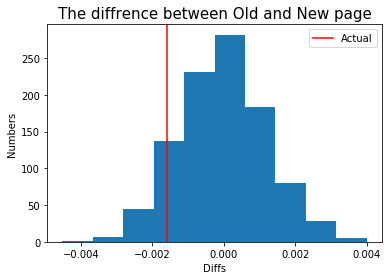

In [70]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);
plt.title('The diffrence between Old and New page',fontsize=15)
plt.xlabel('Diffs')
plt.ylabel('Numbers')
actual=converted_treatment-converted_control
plt.axvline((actual),color='red',label='Actual')
plt.legend();
print("Actual diffrence fro Part1 is: ",actual)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [72]:
def_mean=(actual<p_diffs).mean()
print("The proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is ({:,})".format(def_mean))

The proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is (0.9)


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 #### Findings
 1. def_mean what was calculated is __p-value__
 2. p-value is high which mean our H0 or null hypothesis is fail to reject.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [60]:
import statsmodels.api as sm

convert_old = 
convert_new = 
n_old = 
n_new = 

SyntaxError: invalid syntax (<ipython-input-60-349dcc834059>, line 3)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])